In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('Tourism.csv')

In [3]:
df.shape

(115, 10)

In [4]:
df.head(5)

,Circle,Name of the Monument,Domestic - 2016-17,Foreign - 2016-17,Domestic - 2017-18,Foreign - 2017-18,Domestic Percentage growth - 2017-18/2016-17,Foreign Percentage growth - 2017-18/2016-17,Airport(in km),Railway(in km)
0,Agra Circle,Taj Mahal,5419608,668403,5663136,794556,4.5,18.9,12.0,6.9
1,Agra Circle,Agra Fort,1799953,441326,2008208,489822,11.6,11.0,11.0,5.0
2,Agra Circle,Akbar's Tomb Sikandara,418502,22389,362070,23638,-13.5,5.6,13.0,12.0
3,Agra Circle,Fatehpur Sikri,427854,126114,962069,301181,124.9,138.8,35.0,37.0
4,Agra Circle,Itimad-ud-Daulah,108392,129177,138524,76572,27.8,-40.7,15.0,9.0


In [5]:
df.tail()

,Circle,Name of the Monument,Domestic - 2016-17,Foreign - 2016-17,Domestic - 2017-18,Foreign - 2017-18,Domestic Percentage growth - 2017-18/2016-17,Foreign Percentage growth - 2017-18/2016-17,Airport(in km),Railway(in km)
110,Vadodara Circle,Jama Masjid Saherki Masjid Champaner- Pavagadh,143888,1981,112384,3333,-21.9,68.2,43.0,7.4
111,Vadodara Circle,Buddhist Caves Junagadh,30122,795,40918,1241,35.8,56.1,104.0,1.4
112,Vadodara Circle,"BabaPyara & Khapra Kodiya Caves, Junagarh",343,630,64,0,-81.3,-100.0,104.0,1.5
113,Vadodara Circle,Ashokan Rock Edicts,0,0,0,0,NaN,NaN,NaN,NaN
114,Leh Mini Circle,Leh Palace,37079,7298,43434,7549,17.1,3.4,1.0,NaN


In [6]:
df['Circle'] = df['Circle'].map(lambda x: x.rstrip('Circle'))

In [7]:
df.drop(df.tail(2).index,inplace=True)

In [8]:
df.fillna(0,inplace=True)

In [9]:
num_data = df.select_dtypes(exclude='object').columns.tolist()
cat_data = df.select_dtypes(include='object').columns.tolist()

print(num_data)
print(cat_data)


['Domestic - 2016-17', 'Foreign - 2016-17', 'Domestic - 2017-18', 'Foreign - 2017-18', 'Domestic Percentage growth - 2017-18/2016-17', 'Foreign Percentage growth - 2017-18/2016-17', 'Airport(in km)', 'Railway(in km)']
['Circle', 'Name of the Monument']


In [10]:
df.isna().sum()

Circle                                          0
Name of the Monument                            0
Domestic - 2016-17                              0
Foreign - 2016-17                               0
Domestic - 2017-18                              0
Foreign - 2017-18                               0
Domestic Percentage growth - 2017-18/2016-17    0
Foreign Percentage growth - 2017-18/2016-17     0
Airport(in km)                                  0
Railway(in km)                                  0
dtype: int64

In [11]:
for i in num_data:
    sns.histplot(x=df[i],kde=True)
    plt.xlabel(i)
    plt.show()

AttributeError: module 'seaborn' has no attribute 'histplot'

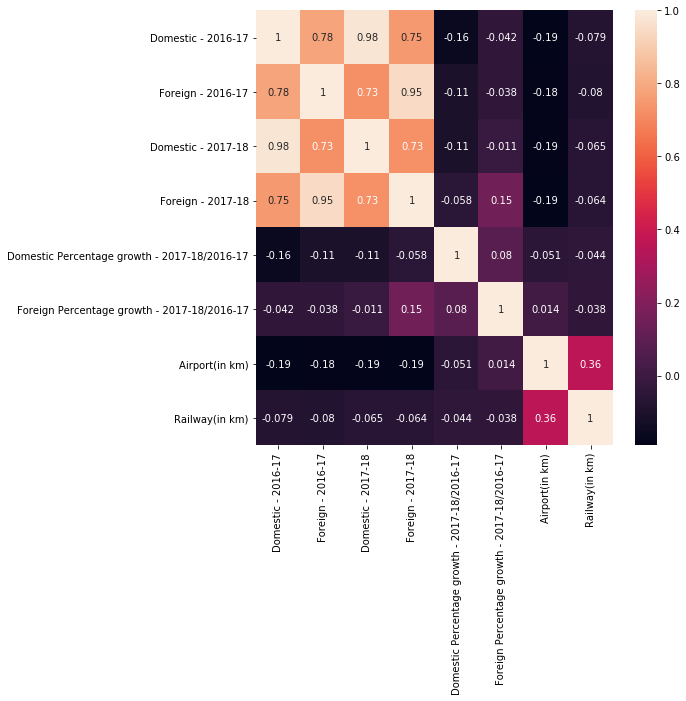

In [17]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True)

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, RobustScaler

pt = PowerTransformer()
for i in num_data:
    df[i] = pt.fit_transform(np.array(df[i]).reshape(-1,1))

In [15]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PowerTransformer,RobustScaler

pt=PowerTransformer()
#features = ["Domestic - 2016-17", "Foreign - 2016-17","Domestic - 2017-18", "Foreign - 2017-18"]

features = ["Domestic - 2016-17", "Foreign - 2016-17"]

X_subset = df[features] 
scaler = PowerTransformer().fit(X_subset)
X = scaler.transform(X_subset)
pd.DataFrame(X, columns=X_subset.columns).describe()

,Domestic - 2016-17,Foreign - 2016-17
count,1.130000e+02,1.130000e+02
mean,-1.571997e-17,-5.403740e-17
std,1.004454e+00,1.004454e+00
min,-2.667986e+00,-2.802839e+00
25%,-6.907857e-01,-7.220644e-01
50%,4.918828e-02,-3.171552e-02
75%,6.036078e-01,7.405124e-01
max,2.788336e+00,2.295821e+00


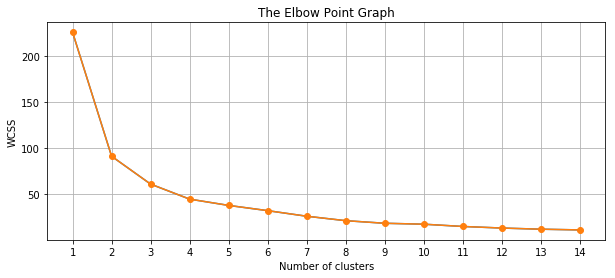

In [19]:
from sklearn.cluster import KMeans
wcss = []  
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=101)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 4))
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.plot(range(1, 15), wcss, "-o")
plt.xticks(range(1, 15))
plt.grid(True)
plt.show()

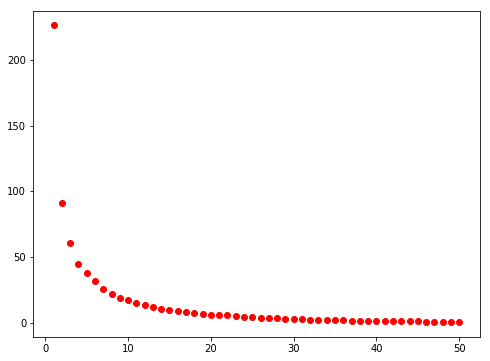

The best K sugest:  9


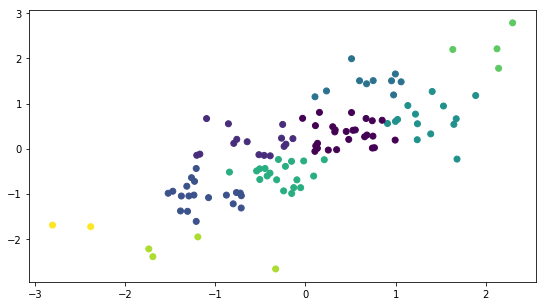

In [20]:
from sklearn.cluster import KMeans
wcss = [] 
cl=50
corte = 0.1
anterior = 100000000000000
cost = []
K_best = cl

for k in range(1,cl+1):
    model = KMeans(n_clusters=k, init='k-means++',n_init=10,max_iter=300,tol=1e-04,random_state=10)
    model=model.fit(X)
    labels=model.labels_
    interia=model.inertia_
    if (K_best == cl) and (((anterior - interia)/anterior) < corte):
        K_best = k - 1
    cost.append(interia)
    anterior = interia
    
plt.figure(figsize=(8, 6))
plt.scatter(range(1, cl+1), cost, c='red')
plt.show()

print('The best K sugest: ', K_best)
model = KMeans(n_clusters=K_best, init='k-means++', n_init=10,
               max_iter=300, tol=1e-04, random_state=101)

model = model.fit(X)
labels = model.labels_

fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(121)
plt.scatter(x=X[:, 1], y=X[:, 0], c=model.labels_.astype(float))

In [21]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

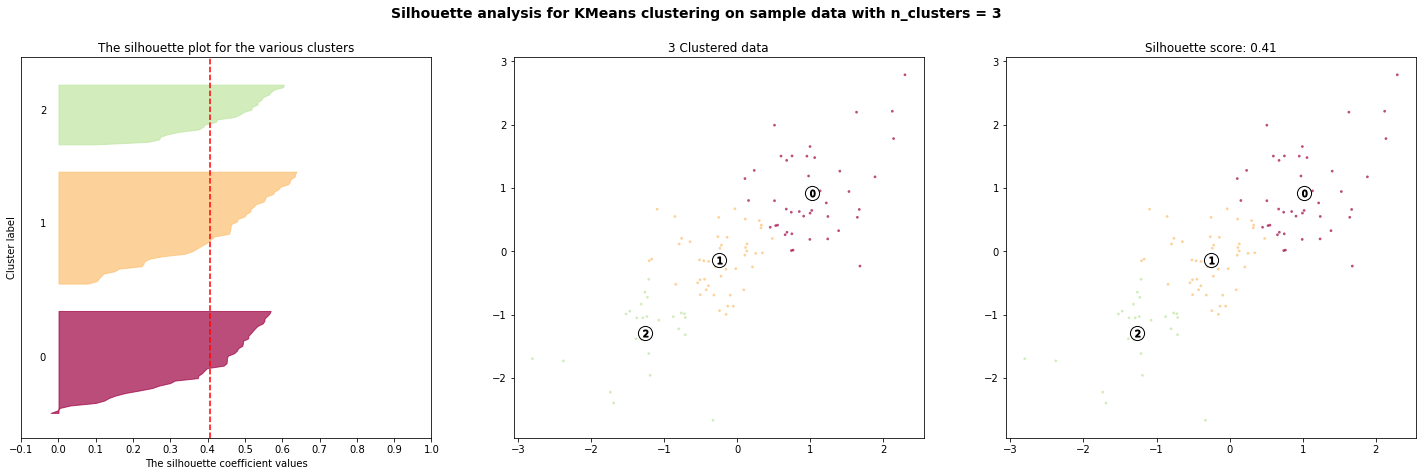

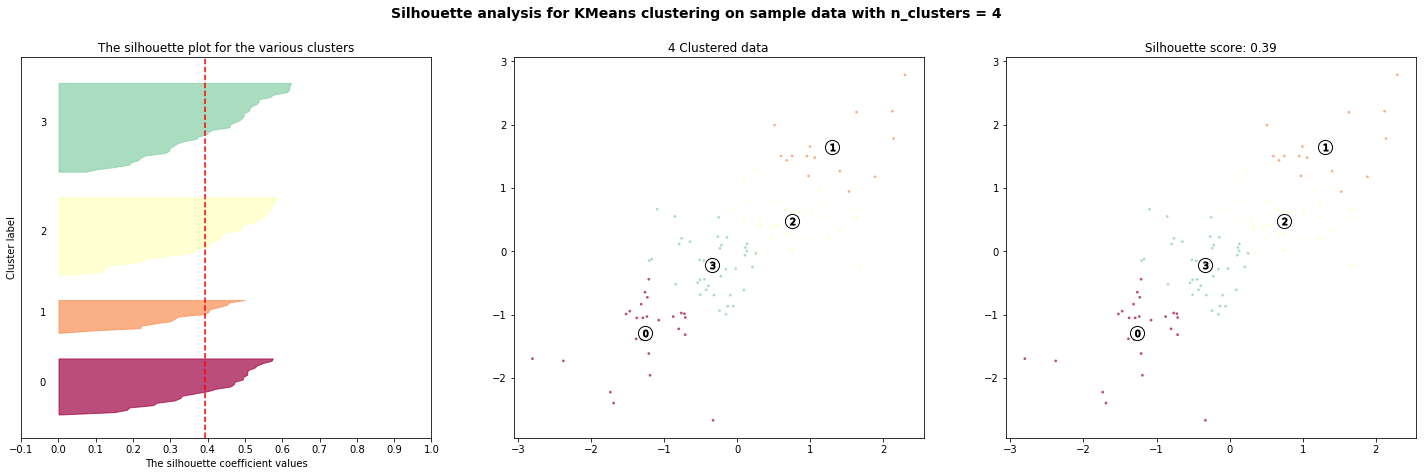

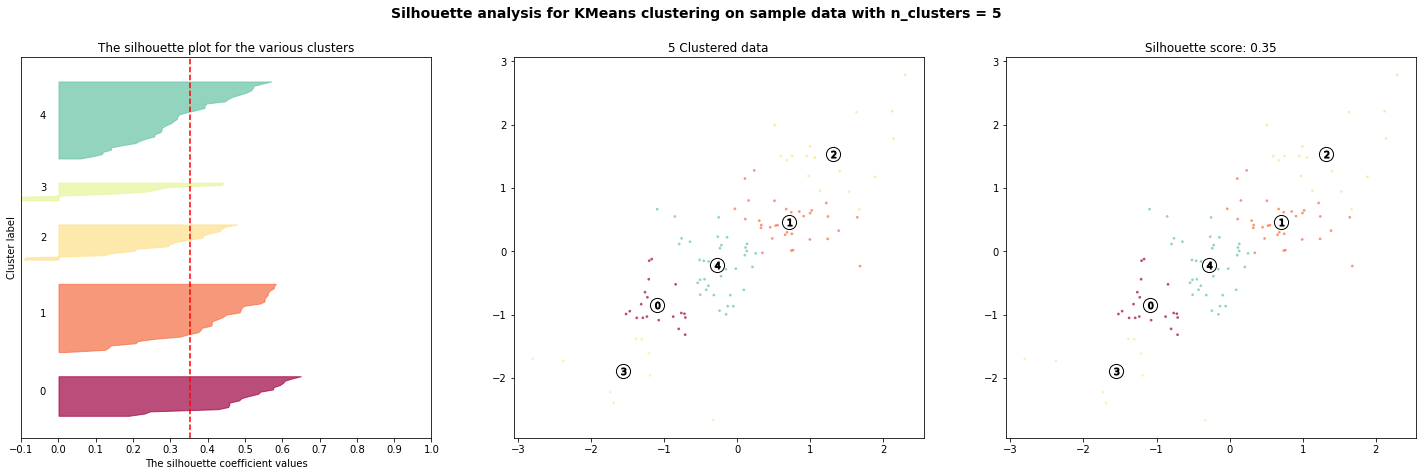

In [22]:
cluster_centers = dict()
K_best=6
for n_clusters in range(3,K_best):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    fig.set_size_inches(25, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10,max_iter=300, tol=1e-04, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X = X, labels = cluster_labels)
    cluster_centers.update({n_clusters :{'cluster_center':clusterer.cluster_centers_,
                                         'silhouette_score':silhouette_avg,
                                         'labels':cluster_labels}
                           })

    sample_silhouette_values = silhouette_samples(X = X, labels = cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    
    centers = clusterer.cluster_centers_
    y = 0
    x = 1
    ax2.scatter(X[:, x], X[:, y], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')   
    ax2.scatter(centers[:, x], centers[:, y], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[x], c[y], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    ax2.set_title("{} Clustered data".format(n_clusters))
    

    x = 1
    ax3.scatter(X[:, x], X[:, y], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')   
    ax3.scatter(centers[:, x], centers[:, y], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax3.scatter(c[x], c[y], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    ax3.set_title("Silhouette score: {:1.2f}".format(cluster_centers[n_clusters]['silhouette_score']))
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()

In [23]:
for i in range(3, K_best+1, 2):
    print("for {} clusters the silhouette score is {:1.3f}".format(
        i, cluster_centers[i]['silhouette_score']))
    print("Centers of each cluster:")
    cent_transformed = scaler.inverse_transform(
        cluster_centers[i]['cluster_center'])
    print(pd.DataFrame(cent_transformed, columns=features))
    print('-'*50)

for 3 clusters the silhouette score is 0.406
Centers of each cluster:
   Domestic - 2016-17  Foreign - 2016-17
0            0.914723           1.025810
1           -0.129642          -0.252600
2           -1.297566          -1.261753
--------------------------------------------------
for 5 clusters the silhouette score is 0.354
Centers of each cluster:
   Domestic - 2016-17  Foreign - 2016-17
0           -0.850559          -1.093086
1            0.462639           0.703937
2            1.543837           1.317265
3           -1.896496          -1.554083
4           -0.217002          -0.283986
--------------------------------------------------


,Circle,Name of the Monument,Domestic - 2016-17,Foreign - 2016-17,Domestic - 2017-18,Foreign - 2017-18,Domestic Percentage growth - 2017-18/2016-17,Foreign Percentage growth - 2017-18/2016-17,Airport(in km),Railway(in km),clusters_3,clusters_4,clusters_5
0,Agra,Taj Mahal,2.785335,2.310067,2.791137,2.376603,-0.345182,0.038265,-0.933925,-0.024183,0,1,2
1,Agra,Agra Fort,1.779534,2.152524,1.758823,2.161450,-0.254562,0.023279,-0.994926,-0.309741,0,1,2
2,Agra,Akbar's Tomb Sikandara,0.646457,1.021020,0.374888,0.881740,-0.718199,0.010177,-0.876844,0.438802,0,2,1
3,Agra,Fatehpur Sikri,0.662112,1.677120,1.119554,1.948254,0.852686,0.156636,-0.095946,1.237085,0,2,2
4,Agra,Itimad-ud-Daulah,-0.232040,1.686228,-0.256074,1.364267,-0.070553,-1.024749,-0.772509,0.203184,0,2,1


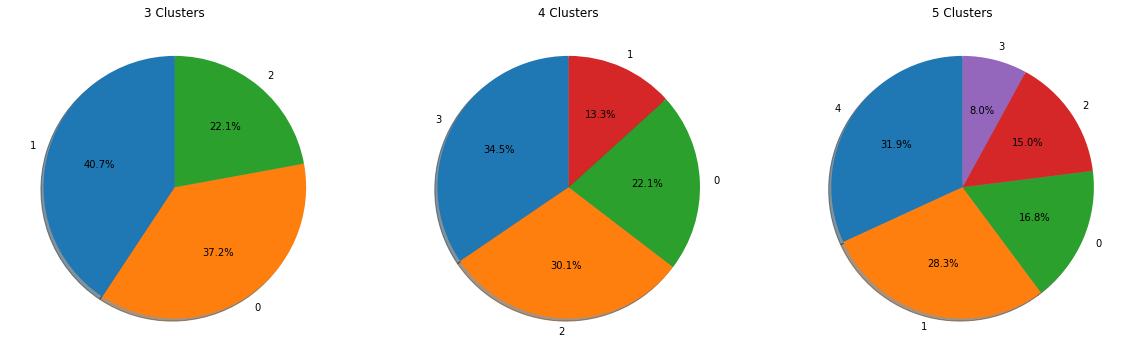

In [24]:
df['clusters_3'] = cluster_centers[3]['labels']
df['clusters_4'] = cluster_centers[4]['labels']

df['clusters_5'] = cluster_centers[5]['labels']
display(df.head())

fig = plt.figure(figsize=(20, 7))
f1 = fig.add_subplot(131)
market = df.clusters_3.value_counts()
g = plt.pie(market, labels=market.index,
            autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('3 Clusters')


f1 = fig.add_subplot(132)
market = df.clusters_4.value_counts()
g = plt.pie(market, labels=market.index,
            autopct='%1.1f%%', shadow=True, startangle=90)        
plt.title('4 Clusters')


f1 = fig.add_subplot(133)
market = df.clusters_5.value_counts()
g = plt.pie(market, labels=market.index,
            autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('5 Clusters')
plt.show()

Text(0.5, 1.0, '4 Clusters')

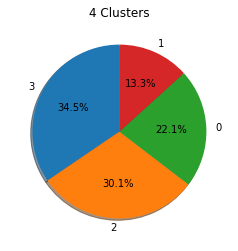

In [26]:
market = df.clusters_4.value_counts()
g = plt.pie(market, labels=market.index,
            autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('4 Clusters')

In [27]:
clusterer = KMeans(n_clusters=4,init='k-means++',random_state=10).fit(X)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(X)
print(centers)

[[-1.29714462 -1.26431751]
 [ 1.64274061  1.30247767]
 [ 0.48260248  0.74661353]
 [-0.22105072 -0.34138685]]


['blue', 'blue', 'purple', 'purple', 'purple', 'purple', 'green', 'orange', 'blue', 'blue']


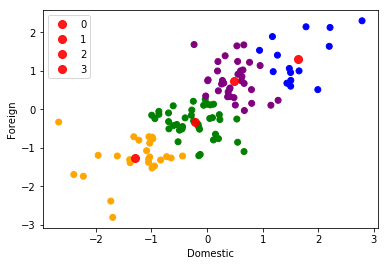

In [31]:
import matplotlib
fig = plt.figure(figsize=(6, 4))
colors = ['orange', 'blue', 'purple', 'green']
colored = [colors[k] for k in c_preds]
print(colored[0:10])
plt.scatter(X[:, 0], X[:, 1], color=colored)
for ci, c in enumerate(centers):
    plt.plot(c[0], c[1], 'o', markersize=8,
             color='red', alpha=0.9, label=''+str(ci))

plt.xlabel('Domestic')
plt.ylabel('Foreign')
plt.legend()
plt.show()

In [32]:
data=pd.DataFrame()

data['Circle']=df.Circle.copy()
data=pd.get_dummies(data,columns=['Circle'])

In [33]:
data.insert(0,'Circle',df['Circle'])

In [35]:
clust_prod = data.copy()
clust_prod['cluster'] = c_preds

clust_prod.head(10)

,Circle,Circle_Agra,Circle_Aurangabad,Circle_Bengaluru,Circle_Bhopal,Circle_Bhubaneswar,Circle_Chandigarh,Circle_Chennai,Circle_Delhi,Circle_Dharwad,...,Circle_Lucknow,Circle_Mumbai,Circle_Patna,Circle_Raipur,Circle_Sarnath,Circle_Shimla Mini,Circle_Srinagar,Circle_Thrissur,Circle_Vadodara,cluster
0,Agra,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Agra,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Agra,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,Agra,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,Agra,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
5,Agra,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
6,Agra,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
7,Agra,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Aurangabad,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,Aurangabad,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [36]:
c0 = clust_prod[clust_prod['cluster'] == 0].drop('cluster', axis=1).mean()
c0.sort_values(ascending=False)[0:10]

Circle_Chennai         0.16
Circle_Srinagar        0.12
Circle_Hyderabad       0.08
Circle_Mumbai          0.08
Circle_Delhi           0.08
Circle_Guwahati        0.08
Circle_Hampi Mini      0.04
Circle_Bhopal          0.04
Circle_Bhubaneswar     0.04
Circle_Chandigarh      0.04
dtype: float64

In [37]:
c1 = clust_prod[clust_prod['cluster'] == 1].drop('cluster', axis=1).mean()
c1.sort_values(ascending=False)[0:10]

Circle_Delhi           0.266667
Circle_Hyderabad       0.133333
Circle_Aurangabad      0.133333
Circle_Agra            0.133333
Circle_Sarnath         0.066667
Circle_Mumbai          0.066667
Circle_Bengaluru       0.066667
Circle_Bhubaneswar     0.066667
Circle_Chennai         0.066667
Circle_Dharwad         0.000000
dtype: float64

In [38]:
c2 = clust_prod[clust_prod['cluster'] == 2].drop('cluster', axis=1).mean()
c2.sort_values(ascending=False)[0:10]

Circle_Agra           0.117647
Circle_Bhopal         0.117647
Circle_Dharwad        0.117647
Circle_Bengaluru      0.088235
Circle_Mumbai         0.088235
Circle_Lucknow        0.058824
Circle_Aurangabad     0.058824
Circle_Jodhpur        0.058824
Circle_Vadodara       0.058824
Circle_Patna          0.058824
dtype: float64

In [39]:
c3 = clust_prod[clust_prod['cluster'] == 3].drop('cluster', axis=1).mean()
c3.sort_values(ascending=False)[0:10]

Circle_Hyderabad       0.102564
Circle_Mumbai          0.102564
Circle_Guwahati        0.076923
Circle_Patna           0.076923
Circle_Delhi           0.076923
Circle_Aurangabad      0.051282
Circle_Bhopal          0.051282
Circle_Bhubaneswar     0.051282
Circle_Chennai         0.051282
Circle_Vadodara        0.051282
dtype: float64

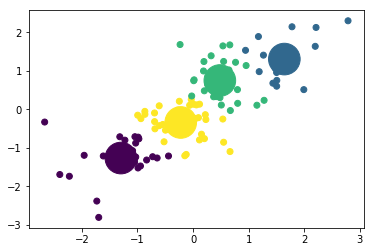

In [40]:
centroids=clusterer.cluster_centers_
plt.scatter(X[:,0], X[:,1], c=c_preds)
plt.scatter(centroids[:, 0], centroids[:, 1],
            c=range(centroids.shape[0]), s=1000)

In [41]:
from scipy.spatial import distance_matrix

dist_mat = pd.DataFrame(distance_matrix(X, centroids))

dist_mat.groupby(c_preds).mean()

,0,1,2,3
0,0.625973,3.929642,2.725054,1.484556
1,3.925830,0.681426,1.377771,2.522008
2,2.718093,1.372846,0.488692,1.356139
3,1.484516,2.521363,1.361770,0.497578
